In [1]:
import os
import pandas as pd

csv_folder = r"C:\Users\Public\GranularFlowDataset"  # 🔁 Update this path
all_data = []

In [2]:

def extract_granular_info(filepath):
    with open(filepath, 'r', encoding='utf-8') as f:
        lines = f.readlines()

    metadata = {
        "Filename": os.path.basename(filepath)
    }

    # 🧭 Extract metadata
    for line in lines[:15]:
        if "center" in line:
            lat, lon = line.split("=")[-1].strip().split(",")
            metadata["Latitude"] = float(lat)
            metadata["Longitude"] = float(lon)
        elif "size" in line:
            x, y = line.split("=")[-1].strip().split(",")
            metadata["SizeX_m"] = float(x)
            metadata["SizeY_m"] = float(y)
        elif "pixel scale" in line:
            px = line.split("=")[-1].strip().split(",")[0]
            metadata["PixelScale_m"] = float(px)

    # 📊 Read data table
    df = pd.read_csv(filepath, skiprows=5)

    # 🧪 Parameters to extract
    parameters = {
        'OMAT_mean': 'Derived Optical Maturity',
        'Slope_mean': 'TerrainSlope',
        'Height_mean': 'TerrainHeight'
    }

    for key, param in parameters.items():
        row = df[df['source'].str.contains(param, case=False, na=False)]
        if not row.empty:
            metadata[key] = row['mean'].values[0]

    return metadata



In [3]:

# 🔁 Loop through all CSVs in the folder
for file in os.listdir(csv_folder):
    if file.endswith(".csv"):
        full_path = os.path.join(csv_folder, file)
        try:
            data = extract_granular_info(full_path)
            all_data.append(data)
        except Exception as e:
            print(f"❌ Error processing {file}: {e}")

# ✅ Create DataFrame
df_all = pd.DataFrame(all_data)
df_all.to_csv(os.path.join(csv_folder, "Master_GranularFlow.csv"), index=False)
df_all.head()


,Filename,Latitude,Longitude,SizeX_m,SizeY_m,PixelScale_m,OMAT_mean,Slope_mean,Height_mean
0,quickmap-region-data (23).csv,-19.891294,-60.449075,18688.784941,18791.622102,1174.476381,-inf,16.26750,-741.1010
1,quickmap-region-data (24).csv,-55.582969,-42.129870,4035.535317,4057.748538,253.609284,0.258987,16.46700,-1596.1200
2,quickmap-region-data (25).csv,14.834807,-48.217851,804.947151,809.390862,50.586929,0.240909,15.84550,-2799.4800
3,quickmap-region-data (26).csv,76.817498,-36.269526,17565.126345,17661.880696,1103.867544,0.295140,20.05060,-2093.6700
4,quickmap-region-data (27).csv,-48.219059,-24.265040,41634.326436,41863.647348,2616.477959,0.167859,8.01374,41.9418


In [4]:
df_all

,Filename,Latitude,Longitude,SizeX_m,SizeY_m,PixelScale_m,OMAT_mean,Slope_mean,Height_mean
0,quickmap-region-data (23).csv,-19.891294,-60.449075,18688.784941,18791.622102,1174.476381,-inf,16.267500,-741.1010
1,quickmap-region-data (24).csv,-55.582969,-42.129870,4035.535317,4057.748538,253.609284,0.258987,16.467000,-1596.1200
2,quickmap-region-data (25).csv,14.834807,-48.217851,804.947151,809.390862,50.586929,0.240909,15.845500,-2799.4800
3,quickmap-region-data (26).csv,76.817498,-36.269526,17565.126345,17661.880696,1103.867544,0.295140,20.050600,-2093.6700
4,quickmap-region-data (27).csv,-48.219059,-24.265040,41634.326436,41863.647348,2616.477959,0.167859,8.013740,41.9418
5,quickmap-region-data (28).csv,-19.253447,-13.831888,11914.761322,13865.396521,866.587283,0.169278,4.784010,-1658.8400
6,quickmap-region-data (29).csv,29.751556,-11.015761,30321.862395,30488.858248,1905.553640,0.186344,11.027700,-2630.4500
7,quickmap-region-data (30).csv,-64.533239,-3.674173,14033.045486,14110.325873,881.895367,0.195473,17.302600,-1046.1500
8,quickmap-region-data (31).csv,-11.571800,2.150736,11708.154799,11772.624076,735.789005,0.241869,18.846800,-1320.0000
9,quickmap-region-data (32).csv,12.196019,8.458131,20093.091585,45881.848030,2867.615502,0.154404,2.375440,-686.3330


In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Optional for better aesthetics
sns.set(style="whitegrid")

# Load your master dataset (if not already loaded)
df = pd.read_csv(r"C:\Users\Public\GranularFlowDataset\Master_GranularFlow.csv")

# Calculate Area in km²
df["Area_km2"] = (df["SizeX_m"] * df["SizeY_m"]) / 1e6


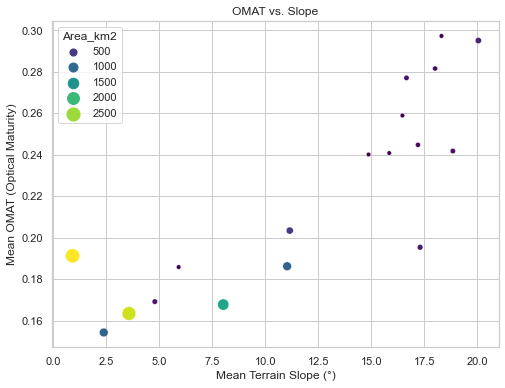

In [6]:
#OMAT VS SLOP
plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x="Slope_mean", y="OMAT_mean", size="Area_km2", hue="Area_km2", palette="viridis", sizes=(20, 200))
plt.title("OMAT vs. Slope")
plt.xlabel("Mean Terrain Slope (°)")
plt.ylabel("Mean OMAT (Optical Maturity)")
plt.grid(True)
plt.show()

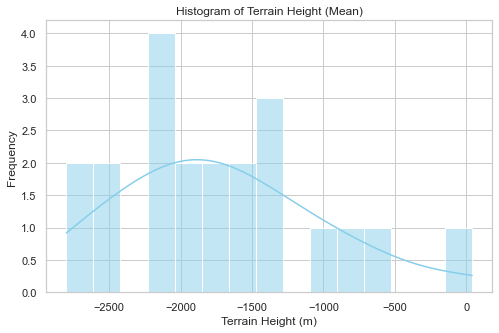

In [7]:
# Histogram of Terrain Height
plt.figure(figsize=(8,5))
sns.histplot(df["Height_mean"], bins=15, kde=True, color='skyblue')
plt.title("Histogram of Terrain Height (Mean)")
plt.xlabel("Terrain Height (m)")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()

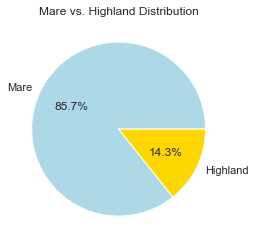

In [8]:
# Pie Chart: Mare vs. Highland (basic classifier using height)e
df["TerrainType"] = df["Height_mean"].apply(lambda h: "Mare" if h < -1000 else "Highland")

terrain_counts = df["TerrainType"].value_counts()
terrain_counts.plot.pie(autopct='%1.1f%%', colors=['lightblue', 'gold'], ylabel="")
plt.title("Mare vs. Highland Distribution")
plt.show()


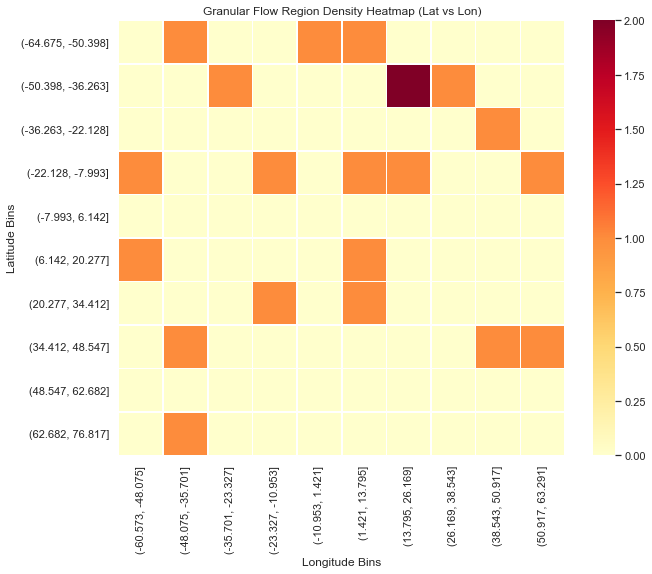

In [9]:
# Heatmap of Granular Flow Density (Lat vs Long grid)Bin lat/long for heatmap
df['Lat_bin'] = pd.cut(df['Latitude'], bins=10)
df['Lon_bin'] = pd.cut(df['Longitude'], bins=10)

heatmap_df = df.groupby(['Lat_bin', 'Lon_bin']).size().unstack(fill_value=0)

plt.figure(figsize=(10,8))
sns.heatmap(heatmap_df, cmap="YlOrRd", linewidths=0.5)
plt.title("Granular Flow Region Density Heatmap (Lat vs Lon)")
plt.xlabel("Longitude Bins")
plt.ylabel("Latitude Bins")
plt.show()


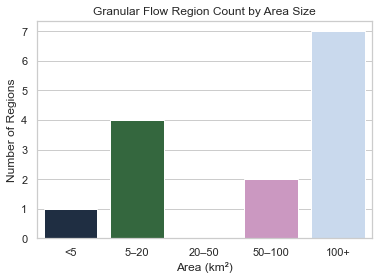

In [10]:
#Bar Chart: Number of Regions by Area Size Brackets
df["AreaBracket"] = pd.cut(df["Area_km2"], bins=[0, 5, 20, 50, 100, 500], labels=["<5", "5–20", "20–50", "50–100", "100+"])
sns.countplot(data=df, x="AreaBracket", palette="cubehelix")
plt.title("Granular Flow Region Count by Area Size")
plt.xlabel("Area (km²)")
plt.ylabel("Number of Regions")
plt.show()


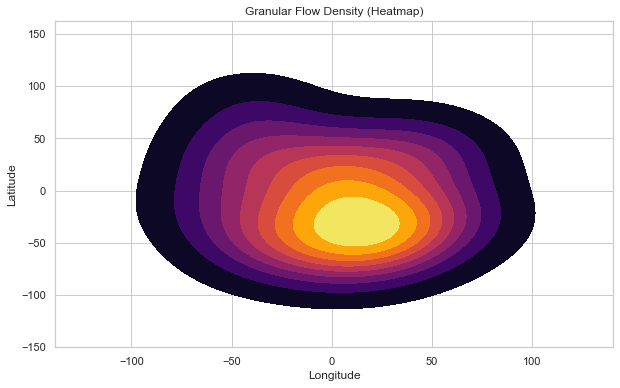

In [12]:
#Heatmap of Flow Density by Latitude & Longitude
plt.figure(figsize=(10, 6))
sns.kdeplot(data=df, x='Longitude', y='Latitude', cmap='inferno', fill=True, bw_adjust=1.2)
plt.title("Granular Flow Density (Heatmap)")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.grid(True)
plt.show()


In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from mpl_toolkits.mplot3d import Axes3D

In [15]:
# Load the processed dataset
df = pd.read_csv(r"C:\Users\Public\GranularFlowDataset\Master_GranularFlow.csv")

# Clean invalid values
df.replace([np.inf, -np.inf], np.nan, inplace=True)
df.dropna(inplace=True)

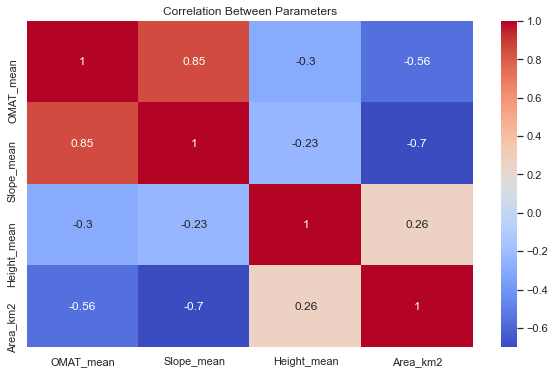

In [17]:
# ---------------- 1. Correlation Heatmap ----------------
# Make sure area is calculated first
df["Area_km2"] = (df["SizeX_m"] * df["SizeY_m"]) / 1e6
plt.figure(figsize=(10, 6))
sns.heatmap(df[["OMAT_mean", "Slope_mean", "Height_mean", "Area_km2"]].corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Between Parameters")
plt.show()

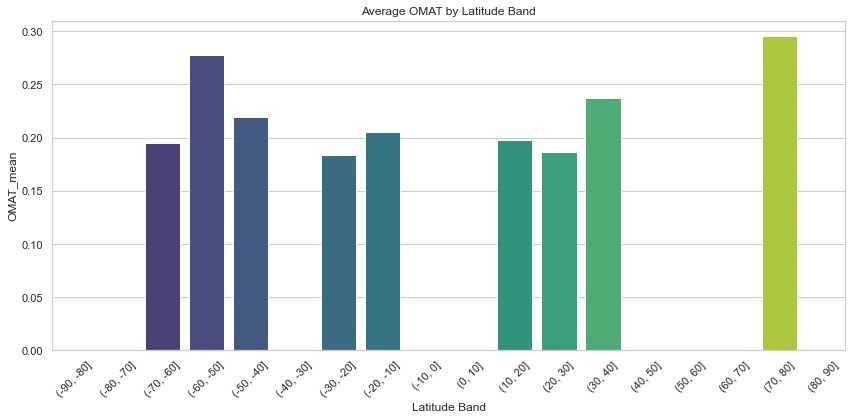

In [18]:
# ---------------- 2. OMAT vs Latitude Heatmap ----------------
plt.figure(figsize=(12, 6))
df["LatBand"] = pd.cut(df["Latitude"], bins=np.arange(-90, 91, 10))
lat_omat = df.groupby("LatBand")["OMAT_mean"].mean().reset_index()
sns.barplot(x="LatBand", y="OMAT_mean", data=lat_omat, palette="viridis")
plt.title("Average OMAT by Latitude Band")
plt.xticks(rotation=45)
plt.ylabel("OMAT_mean")
plt.xlabel("Latitude Band")
plt.tight_layout()
plt.show()

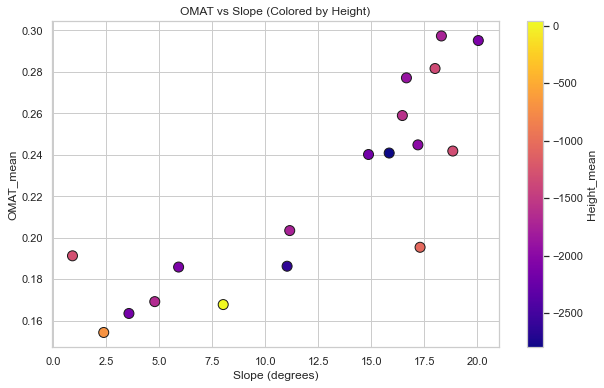

In [19]:
# ---------------- 3. Slope vs OMAT (color by Height) ----------------
plt.figure(figsize=(10, 6))
scatter = plt.scatter(df["Slope_mean"], df["OMAT_mean"], c=df["Height_mean"], cmap="plasma", s=100, edgecolors="k")
plt.colorbar(scatter, label="Height_mean")
plt.xlabel("Slope (degrees)")
plt.ylabel("OMAT_mean")
plt.title("OMAT vs Slope (Colored by Height)")
plt.grid(True)
plt.show()

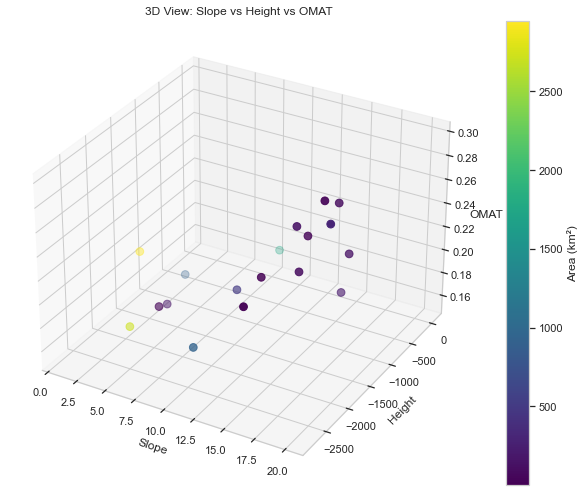

In [20]:
# ---------------- 4. 3D Scatter Plot ----------------
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection="3d")
p = ax.scatter(df["Slope_mean"], df["Height_mean"], df["OMAT_mean"],
               c=df["Area_km2"], cmap="viridis", s=60)
ax.set_xlabel("Slope")
ax.set_ylabel("Height")
ax.set_zlabel("OMAT")
fig.colorbar(p, label="Area (km²)")
plt.title("3D View: Slope vs Height vs OMAT")
plt.tight_layout()
plt.show()

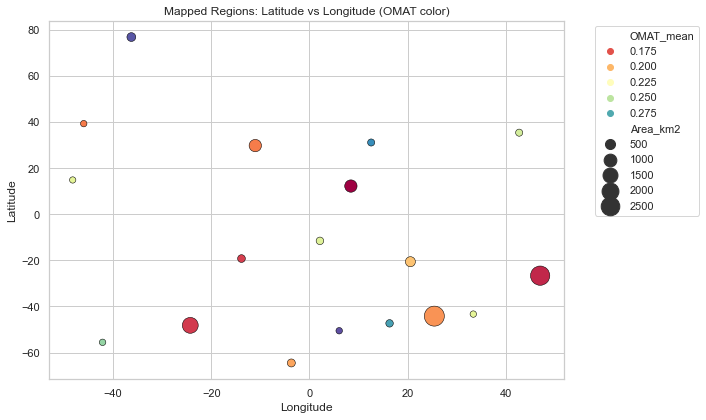

In [21]:
# ---------------- 5. Geo Map: Longitude vs Latitude ----------------
plt.figure(figsize=(10, 6))
sns.scatterplot(x="Longitude", y="Latitude", hue="OMAT_mean", size="Area_km2",
                data=df, palette="Spectral", sizes=(40, 400), edgecolor="black")
plt.title("Mapped Regions: Latitude vs Longitude (OMAT color)")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()

In [23]:
pip install plotly


Note: you may need to restart the kernel to use updated packages.


In [29]:
import plotly.express as px
import numpy as np
import webbrowser

# ---------- 1. Preprocess ----------
# Calculate Area in km² if not already
if "Area_km2" not in df.columns:
    df["Area_km2"] = (df["SizeX_m"] * df["SizeY_m"]) / 1e6

# Handle inf/nan values
df.replace([np.inf, -np.inf], np.nan, inplace=True)
df.dropna(subset=["OMAT_mean", "Slope_mean", "Height_mean", "Area_km2"], inplace=True)

# ---------- 2. 3D Scatter Plot ----------
fig_3d = px.scatter_3d(
    df,
    x="Slope_mean",
    y="Height_mean",
    z="OMAT_mean",
    color="Area_km2",
    size="Area_km2",
    hover_name="Filename",
    title="3D Scatter: Slope vs Height vs OMAT",
    color_continuous_scale="Viridis"
)
fig_3d.write_html("3D_Scatter.html")
webbrowser.open("3D_Scatter.html")



True

In [30]:
# ---------- 3. Bubble Location Map ----------
fig_bubble = px.scatter(
    df,
    x="Longitude",
    y="Latitude",
    color="OMAT_mean",
    size="Area_km2",
    hover_name="Filename",
    title="Lunar Flow Regions (OMAT + Area)",
    color_continuous_scale="Turbo"
)
fig_bubble.update_traces(marker=dict(opacity=0.85, line=dict(width=1, color="DarkSlateGrey")))
fig_bubble.write_html("Bubble_Map.html")
webbrowser.open("Bubble_Map.html")

True

In [32]:
# ---------- 4. OMAT vs Slope ----------
fig_scatter = px.scatter(
    df,
    x="Slope_mean",
    y="OMAT_mean",
    size="Area_km2",
    color="Height_mean",
    hover_data=["Filename", "Latitude", "Longitude"],
    title="OMAT vs Slope (Color=Height, Size=Area)",
    color_continuous_scale="Cividis"
)
fig_scatter.write_html("OMAT_vs_Slope.html")
webbrowser.open("OMAT_vs_Slope.html")


True

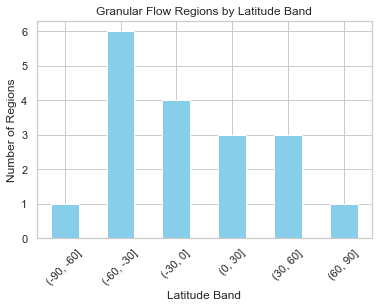

In [39]:
df["LatitudeBand"] = pd.cut(df["Latitude"], bins=[-90, -60, -30, 0, 30, 60, 90])
lat_counts = df["LatitudeBand"].value_counts().sort_index()

lat_counts.plot(kind="bar", color="skyblue")
plt.title("Granular Flow Regions by Latitude Band")
plt.xlabel("Latitude Band")
plt.ylabel("Number of Regions")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()
